# Анализ оценок студентов онлайн школы.
Ответить на следующие вопросы и выполнить следующие задачи:<br>
1). Сколько студентов успешно сдали только один курс?<br>
2). Выявить самый сложный и самый простой экзамен.<br>
3). По каждому предмету определить средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом).<br>
4). Выявить самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3).<br>
5). В период с начала 2013 по конец 2014 выявить семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.<br>
6). Провести RFM кластеризацию студентов.<br>
Данные представленны в 4 разных датасетах.

##### Описание данных assessments.csv:
— файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).<br>
— code_module — идентификационный код предмета.<br>
— code_presentation — семестр (Идентификационный код).<br>
— id_assessment — тест (Идентификационный номер ассессмента).<br>
— assessment_type — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).<br>
— date — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).<br>
— weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.
##### Описание данных courses.csv:
— файл содержит список предметов по семестрам.<br>
— code_module — предмет (идентификационный код).<br>
— code_presentation — семестр (идентификационный код).<br>
— module_presentation_length — продолжительность семестра в днях.<br>
##### Описание данных studentAssessment.csv:
— файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.
— id_assessment — тест (идентификационный номер).<br>
— id_student — идентификационный номер студента.<br>
— date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.<br>
— is_banked — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).<br>
— score — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.<br>
##### Описание данных studentRegistration.csv:
— файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.<br>
— code_module — предмет (идентификационный код).<br>
— code_presentation — семестр (идентификационный код).<br>
— id_student — идентификационный номер студента.<br>
— date_registration — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).<br>
— date_unregistration — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.<br>

### Этапы выполнения проекта:
1. Получение, предобработка и первичный анализ данных.<br>
2. Выяснить, сколько студентов успешно сдали только один курс.<br>
3. Выявить самый сложный и самый простой экзамен.<br>
4. По каждому предмету определить средний срок сдачи экзаменов.<br>
5. Выявить самые популярные предметы по количеству регистраций на них, а также предметы с самым большим оттоком.<br>
6. Выявить семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.<br>
7. Провести кластеризацию студентов.<br>
8. Написать заключительные выводы по проделанной работе.<br>

### Этап 1. Получение, предобработка и первичный анализ данных.
Выгрузим данные, посмотрим на датасеты, пропущенные значения в них, типы данных, сделаем первичный анализ.

In [667]:
# Импортируем требующиеся библиотеки.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
%matplotlib inline

In [198]:
# Считываем данные.
data1 = pd.read_csv('C:/Users/ilyal/Lessons_project/assessments.csv')
data2 = pd.read_csv('C:/Users/ilyal/Lessons_project/courses.csv')
data3 = pd.read_csv('C:/Users/ilyal/Lessons_project/studentAssessment.csv')
data4 = pd.read_csv('C:/Users/ilyal/Lessons_project/studentRegistration.csv')

In [199]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [200]:
data1.sort_values('date').tail(12)        

,code_module,code_presentation,id_assessment,assessment_type,date,weight
94,DDD,2013J,25354,Exam,261.0,100.0
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0


In [201]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 660.0+ bytes


In [202]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [203]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


Итого:<br>
1.В assessments.csv(data1) 11 пропущенных значений в колонке date, все в строках с assessment_type = Exam.<br>
2.В studentAssessment.csv(data3) 173 пропущенных значения в колонке score, пока оставляем пропущенные значения.<br>
3.В studentRegistration.csv(data4) много пропущенных значений в колонке date_unregistration, если студент доучился, то в этой колонке стоит пропуск. Так же есть 45 пропущенных значений в колонке date_registration. Оставляем пропущенные значения.<br>
4.Названия колонок удобные и передают суть находящейся в них информации, оставляем как есть.

### Этап 2. Выяснить, сколько студентов успешно сдали только один курс.
Для ответа на этот вопрос надо дать определение понятию "курс". Курс - это предмет(code_module), который семестрами(code_presentation) разбивается на потоки. Успешное прохождение курса это успешная сдача экзамена(на 40 или более баллов). Значит, надо подсчитать количество студентов, сдавших только один экзамен. Для этого объединим нужные датафреймы, сгруппируем по студентам и, учитывая условие, подсчитаем их колличество.

In [204]:
# Соединяем датафреймы, проверяем результат.
succesful_1course = data3.merge(data1, on='id_assessment', how='left')
succesful_1course

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0
...,...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J,CMA,229.0,0.0
173908,37443,534672,229,0,100.0,GGG,2014J,CMA,229.0,0.0
173909,37443,546286,215,0,80.0,GGG,2014J,CMA,229.0,0.0
173910,37443,546724,230,0,100.0,GGG,2014J,CMA,229.0,0.0


In [205]:
# Примечание: оказывается, у нас есть информация об экзаменах только по курсам 'CCC' и 'DDD'. Учитываем это в дальнейшем анализе.
succesful_1course.query('assessment_type == "Exam"').code_module.value_counts()

code_module
DDD    3044
CCC    1915
Name: count, dtype: int64

In [206]:
# Находим количество студентов, сдавших только 1 курс.
succesful_1course.query('assessment_type == "Exam" & score >= 40') \
                 .groupby('id_student', as_index=False) \
                 .agg({'id_assessment':'count'}) \
                 .query('id_assessment == 1') \
                 .shape[0]

3802

Итого: 3802 студента сдали только 1 курс.<br>
Примечание: у нас есть информация об экзаменах только по курсам 'CCC' и 'DDD', там где требуется анализ экзаменов анализируем только эти курсы.

### Этап 3. Выявить самый сложный и самый простой экзамен.
Для ответа на этот вопрос найдем все экзамены, что у нас есть и подсчитаем долю их завершаемости как отношение успешных сдач экзамена к общему количеству попыток сдать экзамен.

In [207]:
# Воспользуемся уже созданным датасетом. Создадим 2 сабсета, в одном подсчитаем количество успешных попыток сдач экзаменов, во втором подсчитаем
# количество всех попыток.
success_exams = succesful_1course.query('assessment_type == "Exam" & score >= 40') \
                                 .groupby(['code_module', 'id_assessment', 'code_presentation'], as_index=False) \
                                 .agg({'id_student':'count'})
success_exams

,code_module,id_assessment,code_presentation,id_student
0,CCC,24290,2014B,664
1,CCC,24299,2014J,1019
2,DDD,25340,2013B,504
3,DDD,25354,2013J,878
4,DDD,25361,2014B,485
5,DDD,25368,2014J,842


In [208]:
all_tries_exams = succesful_1course.query('assessment_type == "Exam"') \
                                   .groupby(['code_module', 'id_assessment', 'code_presentation'], as_index=False) \
                                   .agg({'id_student':'count'})
all_tries_exams

,code_module,id_assessment,code_presentation,id_student
0,CCC,24290,2014B,747
1,CCC,24299,2014J,1168
2,DDD,25340,2013B,602
3,DDD,25354,2013J,968
4,DDD,25361,2014B,524
5,DDD,25368,2014J,950


In [209]:
# Объединим получившиеся сабсеты в 1 датасет, подсчитаем долю завершаемости экзаменов.
final_completion = success_exams.merge(all_tries_exams, on = ['code_module', 'id_assessment', 'code_presentation'], how = 'inner')
final_completion['completion_rate(%)'] = round(100 * final_completion['id_student_x'] / final_completion['id_student_y'], 1)
final_completion = final_completion.rename(columns = {'id_student_x' : 'success_tries', 'id_student_y' : 'all_tries'})
final_completion

,code_module,id_assessment,code_presentation,success_tries,all_tries,completion_rate(%)
0,CCC,24290,2014B,664,747,88.9
1,CCC,24299,2014J,1019,1168,87.2
2,DDD,25340,2013B,504,602,83.7
3,DDD,25354,2013J,878,968,90.7
4,DDD,25361,2014B,485,524,92.6
5,DDD,25368,2014J,842,950,88.6


Итого:
<ul>
<li>Самым сложным является экзамен 25340 по предмету DDD в семестре 2013B, который сдавало 602 студента, 504 из которых сдали успешно(рейтинг завершаемости 83.7%).
<li>Самым простым является экзамен 25361 по предмету DDD в семестре 2014B, который сдавало 524 студента, 485 из которых сдали успешно(рейтинг завершаемости 92.6%).
<ul>

### Этап 4. По каждому предмету определить средний срок сдачи экзаменов.
Чтобы ответить на этот вопрос, найдем среднее значение времени(колонка date_submitted), требуещееся студентам, чтобы сдать экзамен. Посмотрим на распределение значений времени, чтобы определить лучшую меру центральной тенденции (возможно мода или медиана будет лучше описывать наше распределение, чем среднее).

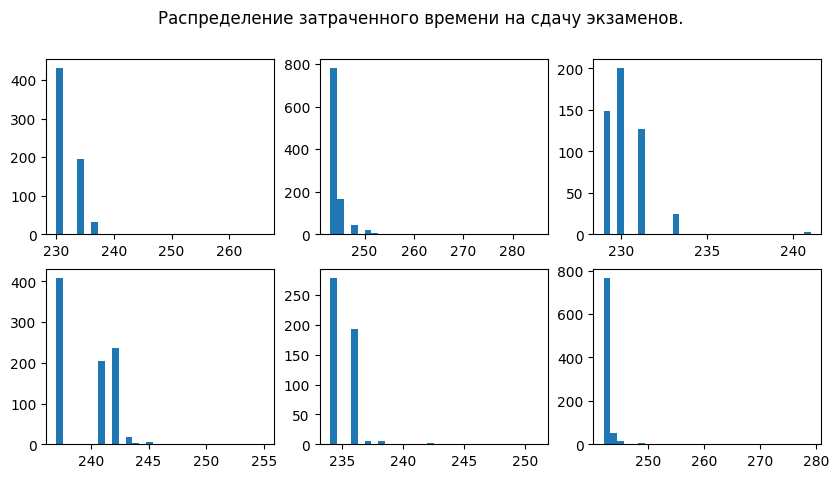

In [210]:
# Возьмем уже имеющийся список экзаменов(24290, 24299, 25340, 25354, 25361, 25368). Построим графики распределения затраченного времени для сдачи
# каждого экзамена.
# Размечаем пространство для вывода графиков.
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 5))
fig.suptitle('Распределение затраченного времени на сдачу экзаменов.')

# Строим гистограммы.
ax1.hist(data = succesful_1course.query('score >= 40 & id_assessment == 24290'), x = 'date_submitted', bins = 30);
ax2.hist(data = succesful_1course.query('score >= 40 & id_assessment == 24299'), x = 'date_submitted', bins = 30);
ax3.hist(data = succesful_1course.query('score >= 40 & id_assessment == 25340'), x = 'date_submitted', bins = 30);
ax4.hist(data = succesful_1course.query('score >= 40 & id_assessment == 25354'), x = 'date_submitted', bins = 30);
ax5.hist(data = succesful_1course.query('score >= 40 & id_assessment == 25361'), x = 'date_submitted', bins = 30);
ax6.hist(data = succesful_1course.query('score >= 40 & id_assessment == 25368'), x = 'date_submitted', bins = 30);

Видим, что распределение не нормальное, неравномерное, унимодальное, практически без выбросов. Найдем средние значения и моды для времени сдачи каждого экзамена, в ответ возьмем средние значения.

In [211]:
# Напишем функцию, которой в качестве аргумента передаем id экзаменов, функция выводит значения среднего значения и моды времени по каждому экзамену.
def mode_mean(lst):
    for i in lst:
        print(f'Среднее значение времени сдачи экзамена {i} = {round(succesful_1course.query("score >= 40 & id_assessment == @i").date_submitted.mean(), 2)}')
        print(f'Мода времени сдачи экзамена {i} = {stats.mode(succesful_1course.query("score >= 40 & id_assessment == @i").date_submitted)[0]}')

exams = [24290, 24299, 25340, 25354, 25361, 25368]
mode_mean(exams)

Среднее значение времени сдачи экзамена 24290 = 231.58
Мода времени сдачи экзамена 24290 = 230
Среднее значение времени сдачи экзамена 24299 = 244.4
Мода времени сдачи экзамена 24299 = 244
Среднее значение времени сдачи экзамена 25340 = 230.16
Мода времени сдачи экзамена 25340 = 230
Среднее значение времени сдачи экзамена 25354 = 239.51
Мода времени сдачи экзамена 25354 = 237
Среднее значение времени сдачи экзамена 25361 = 234.94
Мода времени сдачи экзамена 25361 = 234
Среднее значение времени сдачи экзамена 25368 = 242.8
Мода времени сдачи экзамена 25368 = 243


Итого:
<ul>
<li>Среднее значение времени сдачи экзамена 24290 - 231.58 дней с начала семестра.
<li>Среднее значение времени сдачи экзамена 24299 - 244.4 дня с начала семестра.
<li>Среднее значение времени сдачи экзамена 25340 - 230.16 дней с начала семестра.
<li>Среднее значение времени сдачи экзамена 25354 - 239.51 дней с начала семестра.
<li>Среднее значение времени сдачи экзамена 25361 - 234.94 дня с начала семестра.
<li>Среднее значение времени сдачи экзамена 25368 - 242.8 дня с начала семестра.

### Этап 5. Выявить самые популярные предметы по количеству регистраций на них, а также предметы с самым большим оттоком.
Чтобы ответить на этот вопрос проанализируем data4. В данном случае у нас есть информация по всем предметам. Сгруппируем датафрейм по предметам и подсчитаем количество регистраций и количество студентов, отменивших регистрацию на курс.

In [568]:
# Находим количество регистраций на каждый предмет.
top_registrations = data4.groupby('code_module', as_index=False) \
                         .agg({'id_student':'count'}) \
                         .sort_values('id_student', ascending=False)
top_registrations

,code_module,id_student
1,BBB,7909
5,FFF,7762
3,DDD,6272
2,CCC,4434
4,EEE,2934
6,GGG,2534
0,AAA,748


In [569]:
# Находим количество отмен регистраций для каждого предмета.
top_unregistrations = data4.dropna() \
                           .groupby('code_module', as_index=False) \
                           .agg({'id_student':'count'}) \
                           .sort_values('id_student', ascending=False)
top_unregistrations

,code_module,id_student
5,FFF,2370
1,BBB,2369
3,DDD,2223
2,CCC,1940
4,EEE,716
6,GGG,289
0,AAA,126


In [570]:
# Объединяем полученную информацию в один датафрейм, находим количество отмен регистраций в процентном соотношении к регистрациям.
final_registrations = top_unregistrations.merge(top_registrations, on='code_module', how='inner')

# Создаю колонку с процентом отмен регистраций, переименовываю колонки.
final_registrations['unregistration_rate(%)'] = round(100 * final_registrations['id_student_x'] / final_registrations['id_student_y'], 1)
final_registrations = final_registrations.rename(columns={'id_student_x':'unregistrations', 'id_student_y':'registrations'}) \
                                         .sort_values('registrations', ascending=False) \
                                         .reset_index(drop=True)
final_registrations

,code_module,unregistrations,registrations,unregistration_rate(%)
0,BBB,2369,7909,30.0
1,FFF,2370,7762,30.5
2,DDD,2223,6272,35.4
3,CCC,1940,4434,43.8
4,EEE,716,2934,24.4
5,GGG,289,2534,11.4
6,AAA,126,748,16.8


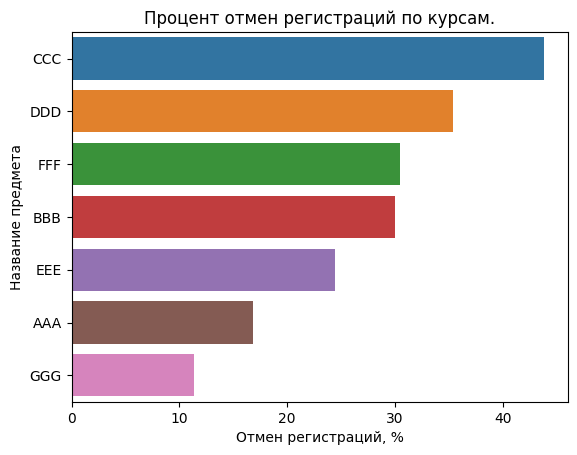

In [571]:
# Изобразим количество отмен регистраций в процентном соотношении к количеству людей, записавшихся на курс.
sns.barplot(data = final_registrations.sort_values('unregistration_rate(%)', ascending=False), x = 'unregistration_rate(%)', y = 'code_module');
plt.xlabel('Отмен регистраций, %')
plt.ylabel('Название предмета')
plt.title('Процент отмен регистраций по курсам.');

Итого:
<ul>
<li>Топ-3 предмета по количеству регистраций на них: BBB - 7909 регистраций, FFF - 7762 регистрации, DDD - 6272 регистрации.
<li>Топ-3 предмета по отменам регистраций(абсолютное значение): FFF - 2370 отмен, BBB - 2369 отмен, DDD - 2223 отмены.
<li>Топ-3 предмета по отменам регистраций(в процентах): CCC - 43.8%, DDD - 35.4%, FFF - 30.5%.

### Этап 6. Выявить семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.
Чтобы ответить на данный вопрос, надо сгруппировать по семестрам экзамены, подсчитать количество успешных сдач и количество всех попыток сдать экзамен, а так же найти среднее значение времени на сдачу экзаменов в каждом семестре. У нас есть только информация об экзаменах по предметам CCC и DDD, анализируем только эти курсы.

In [572]:
# Находим все попытки сдать экзамен по семестрам.
semester_all_tries = succesful_1course.query('assessment_type == "Exam"') \
                                            .groupby('code_presentation', as_index=False) \
                                            .agg({'id_student':'count'})

# Находим удачные сдачи экзаменов по семестрам.
semester_succesful_tries = succesful_1course.query('assessment_type == "Exam" & score >= 40') \
                                      .groupby('code_presentation', as_index=False) \
                                      .agg({'id_student':'count'})

# Находим среднее время сдачи экзамена по семестрам.
semester_avg_time = succesful_1course.query('assessment_type == "Exam"') \
                                     .groupby('code_presentation', as_index=False) \
                                     .agg({'date_submitted':'mean'})

In [573]:
# Объединяем все сабсеты в один датафрейм.
result_semester = semester_succesful_tries.merge(semester_all_tries, on='code_presentation')
result_semester = result_semester.merge(semester_avg_time, on='code_presentation')

# Создаем колонку с завершаемостью курсов, переименовываем колонки и выводим результирующий датафрейм.
result_semester['completion_rate(%)'] = round(100 * result_semester['id_student_x'] / result_semester['id_student_y'], 1)
result_semester['date_submitted'] = round(result_semester['date_submitted'], 2)
result_semester = result_semester.rename(columns={'id_student_x':'succes_tries',
                                                  'id_student_y':'all_tries',
                                                  'date_submitted':'avg_date_submitted'}) \
                                 .sort_values('completion_rate(%)') \
                                 .reset_index(drop=True)
result_semester                                      

,code_presentation,succes_tries,all_tries,avg_date_submitted,completion_rate(%)
0,2013B,504,602,230.18,83.7
1,2014J,1861,2118,243.67,87.9
2,2014B,1149,1271,232.99,90.4
3,2013J,878,968,239.51,90.7


Итого:
<ul>
<li>Семестр с самой низкой завершаемостью курсов - 2013B, завершаемость курсов к нем равна 83.7%
<li>Семестр с самыми долгими средними сроками сдачи курсов - 2014J, средний срок сдачи курсов в нем составляет 243.67 дня.

### Этап 7. Провести кластеризацию студентов.
Проведем кластеризацию студентов. В RFM сегментации в качестве сегментов у нас будут выступать такие метрики, как: requency - среднее время сдачи одного экзамена, frequency - завершаемость курсов и monetary - среднее количество баллов. Так как у нас есть только информация об экзаменах с предметов ССС и DDD, то отберем только тех пользователей, которые регистрировались только на курсы ССС и/или DDD, при этом мы должны учесть и тех, кто не смог сдать ни один экзамен. Для этого из data4 возьмем всех пользователей, зарегистрировавшихся на курсы ССС и/или DDD, приджойним информацию об экзаменах и найдем среднее время сдачи экзаменов, среднюю долю завершаемости курсов и среднюю оценку для каждого студента.

In [708]:
# Возьмем всех студентов, которые проходили CCC или DDD курс.
all_students = data4.query('code_module == "CCC" | code_module == "DDD"')

In [709]:
# Отфильтруем студентов таким образом, чтобы остались только те, которые проходили только курс ССС и/или курс DDD. Сформируем для каждого студента
# список из курсов, которые он проходил.
filter_students = data4.groupby('id_student', as_index=False) \
                       .agg({'code_module': lambda x: list(x)})

# Напишем функцию, которая в качестве аргумента принимает серию со списками курсов, которые проходили студенты и возвращает только те списки, в которых
# нет курсов, не удовлетворяющих нашему условию, вместо тех, что не подходят по условию, возвращает None.
def filter(series):
    my_lst = []
    for i in series:
        if 'AAA' in i or 'BBB' in i or 'EEE' in i or 'FFF' in i or 'GGG' in i:
            my_lst.append(None)
        else:
            my_lst.append(i)
    return my_lst

# Реализовываем функцию и оставляем только не None значения.
filter_students['code_module'] = filter(filter_students.code_module)
filter_students = filter_students.dropna().id_student

# Отфильтровываем студентов в нашем главном датафрейме.
all_students = all_students.query('id_student in @filter_students')
all_students

,code_module,code_presentation,id_student,date_registration,date_unregistration
8657,CCC,2014B,28418,-37.0,NaN
8658,CCC,2014B,29764,-34.0,NaN
8660,CCC,2014B,40333,-30.0,17.0
8661,CCC,2014B,40604,-17.0,NaN
8663,CCC,2014B,45664,-173.0,137.0
...,...,...,...,...,...
19358,DDD,2014J,2684043,-42.0,NaN
19359,DDD,2014J,2685863,-136.0,NaN
19360,DDD,2014J,2689863,-116.0,NaN
19361,DDD,2014J,2698109,-52.0,-2.0


In [710]:
# Джойним информацию об экзаменах.
all_students = all_students.merge(succesful_1course.query('assessment_type == "Exam"'), on = ['id_student', 'code_presentation', 'code_module'], how='left')

# Рассчитываем количество успешных сдач экзамена.
all_students['success_tries'] = all_students.score.apply(lambda x: 1 if x >= 40 else 0)

# Создаем колонку-счетчик всех экзаменов.
all_students['all_tries'] = 1

# Считаем долю удачных сдач.
all_students['completion'] = round(all_students['success_tries'] / all_students['all_tries'], 2)

In [711]:
# Разбиваем главный датафрейм на 2 сабсета взависимости от курса.
all_students_ccc = all_students.query('code_module == "CCC"')
all_students_ddd = all_students.query('code_module == "DDD"')

Так как в каждом курсе вес оценки может быть разным и если в одном курсе оценка 70 может быть хорошей, то в другом, к примеру, она может быть плохой. Поэтому рассчитаем квантили метрик для каждого курса отдельно. Берем 3 квантиля - 0.25, 0.5 и 0.75, чтобы получить 4 отрезка для сегментации значений. Создаем словари с ключами-квантилями и соответствующими значениями к ним, так для каждой метрики, метрика в свою очередь является ключом внешнего словаря.

In [712]:
# Создаем словарь для ССС предмета.
quantile_ccc = all_students_ccc[['date_submitted', 'score', 'completion']].quantile([0.25, 0.5, 0.75]).to_dict()
quantile_ccc['completion'][0.25] = 0.5
quantile_ccc['completion'][0.5] = 0.75
quantile_ccc

{'date_submitted': {0.25: 234.0, 0.5: 244.0, 0.75: 244.0},
 'score': {0.25: 54.0, 0.5: 74.0, 0.75: 92.0},
 'completion': {0.25: 0.5, 0.5: 0.75, 0.75: 1.0}}

In [713]:
# Создаем словарь для DDD предмета.
quantile_ddd = all_students_ddd[['date_submitted', 'score', 'completion']].quantile([0.25, 0.5, 0.75]).to_dict()
quantile_ddd['completion'][0.25] = 0.5
quantile_ddd['completion'][0.5] = 0.75
quantile_ddd

{'date_submitted': {0.25: 234.0, 0.5: 237.0, 0.75: 242.0},
 'score': {0.25: 49.0, 0.5: 64.0, 0.75: 78.0},
 'completion': {0.25: 0.5, 0.5: 0.75, 0.75: 1.0}}

In [714]:
# Реализуем функции для распределения значений по сегментам. На вход функции принимают 2 аргумента - словарь с соответствующими квантилями и серию со 
# значениями метрики, и, взависимости от значения метрики, возвращает ранговое значение для конкретного значения метрики.

# Функция для метрики R.
def date_func(quant, x):
    if x < quant['date_submitted'][0.25]:
        return 4
    elif x < quant['date_submitted'][0.5] and x >= quant['date_submitted'][0.25]:
        return 3
    elif x < quant['date_submitted'][0.75] and x >= quant['date_submitted'][0.5]:
        return 2
    elif x >= quant['date_submitted'][0.75]:
        return 1

# Функция для метрики F.
def completion_func(quant, x):
    if x == 0:
        return None
    if x < quant['completion'][0.25]:
        return 1
    elif x < quant['completion'][0.5] and x >= quant['completion'][0.25]:
        return 2
    elif x < quant['completion'][0.75] and x >= quant['completion'][0.5]:
        return 3
    elif x >= quant['completion'][0.75]:
        return 4

# Функция для метрики M.
def score_func(quant, x):
    if x < quant['score'][0.25]:
        return 1
    elif x < quant['score'][0.5] and x >= quant['score'][0.25]:
        return 2
    elif x < quant['score'][0.75] and x >= quant['score'][0.5]:
        return 3
    elif x >= quant['score'][0.75]:
        return 4

In [715]:
# Применяем функции для всех наших метрик в обоих сабсетах и создаем колонки с R, F, M метриками.
all_students_ccc['R'] = all_students_ccc['date_submitted'].apply(lambda x: date_func(quantile_ccc, x))
all_students_ccc['F'] = all_students_ccc['completion'].apply(lambda x: completion_func(quantile_ccc, x))
all_students_ccc['M'] = all_students_ccc['score'].apply(lambda x: score_func(quantile_ccc, x))

all_students_ddd['R'] = all_students_ddd['date_submitted'].apply(lambda x: date_func(quantile_ddd, x))
all_students_ddd['F'] = all_students_ddd['completion'].apply(lambda x: completion_func(quantile_ddd, x))
all_students_ddd['M'] = all_students_ddd['score'].apply(lambda x: score_func(quantile_ddd, x))

C:\Users\ilyal\AppData\Local\Temp\ipykernel_15428\1206106782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_students_ccc['R'] = all_students_ccc['date_submitted'].apply(lambda x: date_func(quantile_ccc, x))
C:\Users\ilyal\AppData\Local\Temp\ipykernel_15428\1206106782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_students_ccc['F'] = all_students_ccc['completion'].apply(lambda x: completion_func(quantile_ccc, x))
C:\Users\ilyal\AppData\Local\Temp\ipykernel_15428\1206106782.py:4: SettingWith

In [716]:
# Соединяем наши сабсеты обратно в один датафрейм.
frames = [all_students_ccc, all_students_ddd]
all_students = pd.concat(frames)
all_students

,code_module,code_presentation,id_student,date_registration,date_unregistration,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,success_tries,all_tries,completion,R,F,M
0,CCC,2014B,28418,-37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.0,NaN,NaN,NaN
1,CCC,2014B,29764,-34.0,NaN,24290.0,230.0,0.0,94.0,Exam,NaN,100.0,1,1,1.0,4.0,4.0,4.0
2,CCC,2014B,40333,-30.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.0,NaN,NaN,NaN
3,CCC,2014B,40604,-17.0,NaN,24290.0,234.0,0.0,66.0,Exam,NaN,100.0,1,1,1.0,3.0,4.0,2.0
4,CCC,2014B,45664,-173.0,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8912,DDD,2014J,2684043,-42.0,NaN,25368.0,243.0,0.0,69.0,Exam,NaN,100.0,1,1,1.0,1.0,4.0,3.0
8913,DDD,2014J,2685863,-136.0,NaN,25368.0,243.0,0.0,49.0,Exam,NaN,100.0,1,1,1.0,1.0,4.0,2.0
8914,DDD,2014J,2689863,-116.0,NaN,25368.0,242.0,0.0,67.0,Exam,NaN,100.0,1,1,1.0,1.0,4.0,3.0
8915,DDD,2014J,2698109,-52.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.0,NaN,NaN,NaN


In [717]:
# Группируем по id студента и ищем средние значения в колонках с R, F, M метриками и заодно в колонках со значениями времени сдачи экзаменов, 
# завершаемости курсов и оценками по экзамену.
all_students = all_students.groupby('id_student', as_index=False) \
                           .agg({'date_submitted':'mean',
                                 'completion'    :'mean',
                                 'score'         :'mean',
                                 'R'             :'mean',
                                 'F'             :'mean',
                                 'M'             :'mean'})
all_students

,id_student,date_submitted,completion,score,R,F,M
0,3733,NaN,0.0,NaN,NaN,NaN,NaN
1,8462,NaN,0.0,NaN,NaN,NaN,NaN
2,23698,243.0,1.0,80.0,3.0,4.0,3.0
3,24213,236.0,0.5,58.0,3.0,4.0,2.0
4,25261,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
7698,2698109,NaN,0.0,NaN,NaN,NaN,NaN
7699,2698251,234.0,1.0,44.0,3.0,4.0,1.0
7700,2707979,NaN,0.0,NaN,NaN,NaN,NaN
7701,2710343,NaN,0.0,NaN,NaN,NaN,NaN


In [718]:
# Преобразуем значения R, F, M метрик в строковые значения, округлив найденные значения до целого, чтобы создать общую колонку RFM метрики. NaN значения
# заменим нулями, чтобы их проще было кластеризировать.
all_students['R'] = all_students['R'].fillna(0).apply(lambda x: str(round(x)))
all_students['F'] = all_students['F'].fillna(0).apply(lambda x: str(round(x)))
all_students['M'] = all_students['M'].fillna(0).apply(lambda x: str(round(x)))
all_students['RFM'] = all_students['R'] + all_students['F'] + all_students['M']
all_students

,id_student,date_submitted,completion,score,R,F,M,RFM
0,3733,NaN,0.0,NaN,0,0,0,000
1,8462,NaN,0.0,NaN,0,0,0,000
2,23698,243.0,1.0,80.0,3,4,3,343
3,24213,236.0,0.5,58.0,3,4,2,342
4,25261,NaN,0.0,NaN,0,0,0,000
...,...,...,...,...,...,...,...,...
7698,2698109,NaN,0.0,NaN,0,0,0,000
7699,2698251,234.0,1.0,44.0,3,4,1,341
7700,2707979,NaN,0.0,NaN,0,0,0,000
7701,2710343,NaN,0.0,NaN,0,0,0,000


Создаем функцию, кластеризирующую студентов взависимости от их сегмента. Разобьем сегменты студентов на следующие кластеры:
<ul>
<li>[0-4]0[0-4]      : Несостоявшийся студент - студент, который так и не завершил ни одного курса.
<li>444             : Лучший студент - студент, который сдает все экзамены быстрее всех и лучше всех.
<li>[1-4]44         : Отличник - студент, который сдает все экзамены на отличные оценки.
<li>[1-4][1-4][2-3] : Хорошист - студент, который сдает большую часть экзаменов на достаточно неплохие оценки.
<li> остальное      : Троечник - студент, который сдал хотя бы один экзамен, но не большинство своих экзаменов, оценки не очень хорошие.

In [719]:
# Функция принимает в качестве аргумента серию со значениями RFM сегмента студентов, и , взависимости от полученных значений, возвращает соответствующие
# названия кластеров.
def clusterization(x):
    my_lst = []
    for i in x:
        if i == '000' or i[1] == '0':
            my_lst.append('Несостоявшийся студент')
        elif i == '444':
            my_lst.append('Лучший студент')
        elif i[0] in '1234' and i[1] in '4' and i[2] in '4':
            my_lst.append('Отличник')
        elif i[0] in '1234' and i[1] in '234' and i[2] in '23':    
            my_lst.append('Хорошист')   
        else:
            my_lst.append('Троечник')
    return my_lst

# Создаем колонку с названиями кластеров.
all_students['cluster'] = clusterization(all_students['RFM'])

In [720]:
# Группируем по студентам и подсчитываем количество студентов в каждом кластере.
all_students = all_students.groupby('cluster', as_index=False) \
                           .agg({'id_student':'count'}) \
                           .sort_values('id_student', ascending=False) \
                           .rename(columns={'id_student':'students_count'})
all_students

,cluster,students_count
1,Несостоявшийся студент,4115
4,Хорошист,2057
2,Отличник,906
3,Троечник,458
0,Лучший студент,167


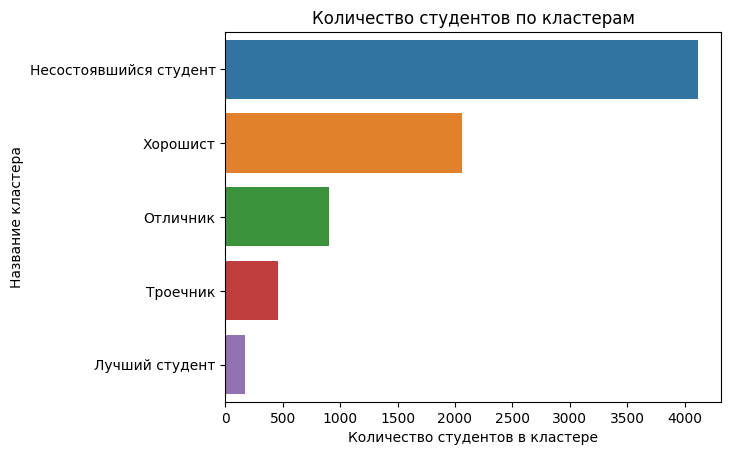

In [721]:
# Изобразим количество студентов в каждом из кластеров на графике.
sns.barplot(data = all_students, x = 'students_count', y = 'cluster');
plt.xlabel('Количество студентов в кластере')
plt.ylabel('Название кластера')
plt.title('Количество студентов по кластерам');

Итого: мы получили кластеры со следующим количеством студентов в них:
<ul>
<li>53.4% несостоявшихся студентов.
<li>26.7% хорошистов.
<li>11.8% отличников.
<li>5.9% троечников.
<li>2.2% лучших студентов.

### Этап 8. Заключительные выводы по проделанной работе.
В ходе исследования я ответил на все вопросы, поставленные вначале работы, выполнил все задачи, нашел легкие и простые курсы, студентов, прошедших только 1 курс, среднее значение времени, требующегося для сдачи каждого экзамена, выявил семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов, выявил самые популярные предметы по количеству регистраций на них, а также предметы с самым большим оттоком, провел кластеризацию студентов.